# Data PreProcessing for Jigsaw Unintended Bias in Toxicity Classification Dataset
* https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data

# 1. Load dataset

In [2]:
# import libs
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

In [3]:
# load raw data
dir = 'jigsaw-unintended-bias-in-toxicity-classification'
# train_data = pd.read_csv(os.path.join(dir,'train.csv'))
# test_data = pd.read_csv(os.path.join(dir,'test.csv'))
raw_data = pd.read_csv(os.path.join(dir,'all_data.csv'))
raw_data.shape

(1999516, 46)

In [4]:
raw_data.head()

,id,comment_text,split,created_date,publication_id,parent_id,article_id,rating,funny,wow,...,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,identity_annotator_count,toxicity_annotator_count
0,1083994,He got his money... now he lies in wait till a...,train,2017-03-06 15:21:53.675241+00,21,NaN,317120,approved,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,67
1,650904,Mad dog will surely put the liberals in mental...,train,2016-12-02 16:44:21.329535+00,21,NaN,154086,approved,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,76
2,5902188,And Trump continues his lifelong cowardice by ...,train,2017-09-05 19:05:32.341360+00,55,NaN,374342,approved,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,63
3,7084460,"""while arresting a man for resisting arrest"".\...",test,2016-11-01 16:53:33.561631+00,13,NaN,149218,approved,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,76
4,5410943,Tucker and Paul are both total bad ass mofo's.,train,2017-06-14 05:08:21.997315+00,21,NaN,344096,approved,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,80


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999516 entries, 0 to 1999515
Data columns (total 46 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   comment_text                         object 
 2   split                                object 
 3   created_date                         object 
 4   publication_id                       int64  
 5   parent_id                            float64
 6   article_id                           int64  
 7   rating                               object 
 8   funny                                int64  
 9   wow                                  int64  
 10  sad                                  int64  
 11  likes                                int64  
 12  disagree                             int64  
 13  toxicity                             float64
 14  severe_toxicity                      float64
 15  obscene                         

# 2. Data Preprocessing

### target dataset format
- raw data to train dataset : ['comment', 'score']
- comment : comment text
- score : weighted average of toxicity features value, finally used min-max normalization

### toxicity features
- features : toxicity, severe_toxicity, obscene, sexual_explicit, identity_attack, insult, threat
- toxicity subtype features whitout "severe_toxicity" are counted with equal weight 1.0
- severe_toxicity is set weight 2.0

In [6]:
# using comment_text and tocixity features
raw_data = raw_data[['comment_text', 'toxicity', 'severe_toxicity', 'obscene', 'sexual_explicit', 'identity_attack', 'insult', 'threat']]
raw_data.head()

,comment_text,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat
0,He got his money... now he lies in wait till a...,0.373134,0.044776,0.089552,0.014925,0.000000,0.343284,0.014925
1,Mad dog will surely put the liberals in mental...,0.605263,0.013158,0.065789,0.013158,0.092105,0.565789,0.065789
2,And Trump continues his lifelong cowardice by ...,0.666667,0.015873,0.031746,0.000000,0.047619,0.666667,0.000000
3,"""while arresting a man for resisting arrest"".\...",0.815789,0.065789,0.552632,0.592105,0.000000,0.684211,0.105263
4,Tucker and Paul are both total bad ass mofo's.,0.550000,0.037500,0.337500,0.275000,0.037500,0.487500,0.000000


In [7]:
# weighted 2.0 'severe_toxicity'
raw_data.loc[raw_data['severe_toxicity'] != 0, 'severe_toxicity'] *= 2.0
raw_data.head()

,comment_text,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat
0,He got his money... now he lies in wait till a...,0.373134,0.089552,0.089552,0.014925,0.000000,0.343284,0.014925
1,Mad dog will surely put the liberals in mental...,0.605263,0.026316,0.065789,0.013158,0.092105,0.565789,0.065789
2,And Trump continues his lifelong cowardice by ...,0.666667,0.031746,0.031746,0.000000,0.047619,0.666667,0.000000
3,"""while arresting a man for resisting arrest"".\...",0.815789,0.131579,0.552632,0.592105,0.000000,0.684211,0.105263
4,Tucker and Paul are both total bad ass mofo's.,0.550000,0.075000,0.337500,0.275000,0.037500,0.487500,0.000000


In [8]:
# weighted avg without zero values
raw_data = raw_data.replace(0.0, np.NaN)
means=raw_data.mean(axis=1, skipna=True)
print(means)

df = pd.DataFrame(columns=['comment', 'score'])
df['comment'] = raw_data['comment_text']
df['score'] = means

df.head()

0          0.154229
1          0.204887
2          0.288889
3          0.480263
4          0.293750
             ...   
1999511    0.300000
1999512    0.400000
1999513    0.260000
1999514    0.233333
1999515    0.275000
Length: 1999516, dtype: float64


,comment,score
0,He got his money... now he lies in wait till a...,0.154229
1,Mad dog will surely put the liberals in mental...,0.204887
2,And Trump continues his lifelong cowardice by ...,0.288889
3,"""while arresting a man for resisting arrest"".\...",0.480263
4,Tucker and Paul are both total bad ass mofo's.,0.293750


In [36]:
df.to_csv('jigsaw_unintended_preprocessing.csv', index=False)

<AxesSubplot:>

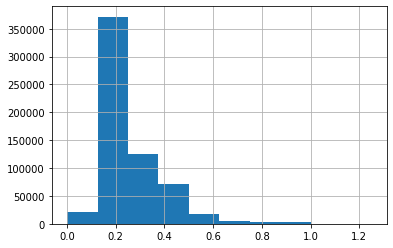

In [9]:
import matplotlib.pyplot as plt
df['score'].hist()